In [112]:
import pytrends
import numpy as np
import pandas as pd
import requests
import lxml
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


num = 3000
pd.set_option('display.max_columns', num)
pd.set_option('display.max_rows', num)
pd.set_option('display.max_colwidth', num)

names = ['Ally_Financial', 'First_Financial_Bank', 'Bank_of_America', 'Bank_of_the_West', 'Truist_Financial', 
         'BMO_Harris_Bank', 'Capital_One', 'Chase', 'Citi_Bank', 'Citizens_Financial_Group', 'Fifth_Third_Bank', 
         'Huntington_Bancshares', 'JPMorgan_Chase', 'KeyBank', 'PNC_Financial_Services', 
         'Regions_Financial_Corporation', 'SunTrust_Banks', 'TD_Bank,_N.A.', 'U.S._Bancorp', 'Wells_Fargo']

In [151]:
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. 
# Only needed for interest_over_time(), interest_by_region() & related_queries()
# Up to five terms in a list


#add for query items(5 max for data pull)
kw1 = 'Chase'
kw2 = 'PNC'
kw3 = 'Bank of America'
kw4 = 'Wells Fargo'
kw5 = 'Capital One'
#For charting, set YES for comparison items 
q2 = 'YES'
q3 = 'YES'
q4 = 'YES'
q5 = 'YES'


user_kw_list = []
user_kw_list.append(kw1)
user_kw_list.append(kw2)
user_kw_list.append(kw3)
user_kw_list.append(kw4)
user_kw_list.append(kw5)


#start from today and go back up to 5 years, #-(d, m, y) for # of days, months, or years
user_timeframe = 'today 5-y' 

#Country of interest, leave empty for global interest
user_geo = 'US'

end_date= date.today()
today_date = date.today()
end_date = today_date

#TODO:Fix date set to match trend pull begin date
begin_date = datetime.date(2015,5,24)

numdays = 7
numweeks = 52

#depends on user_timeframe
numyears = 5

total_time_range = numdays * numweeks * numyears

#Builds trend data pull
pytrend.build_payload(kw_list = user_kw_list, timeframe = user_timeframe, geo=user_geo)




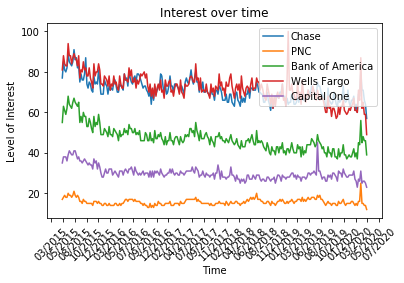

In [152]:
# Interest Over Time
# Google Trends does not relay specific view counts of topics.
# Simply, the numbers correlate to relative virality of a topic,
# where 100 is maximum trend and 0 is minimum trend

# interest over time provides weekly intervals for trend analysis
interest_over_time_df = pytrend.interest_over_time()

#Builds weekly date list
datelist = [begin_date]
for index in range (0, numweeks*numyears):
    datelist.append(datelist[index] + (datetime.timedelta(days = numdays)))
x_axis = datelist

# Plot into a chart 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,14*numyears))
plt.gcf().autofmt_xdate()

# Plots first list entry
plt.plot (x_axis, interest_over_time_df.iloc[:,0], label = kw1)

# For each of next 4 entries, check if user wants them plotted
if q2.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,1], label = kw2)
if q3.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,2], label = kw3)
if q4.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,3], label = kw4)
if q5.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,4], label = kw5)
    
#?
plt.xticks(rotation=45)

# Plot labels
plt.xlabel('Time')
plt.ylabel('Level of Interest')
plt.title('Interest over time')
plt.legend()
plt.show()

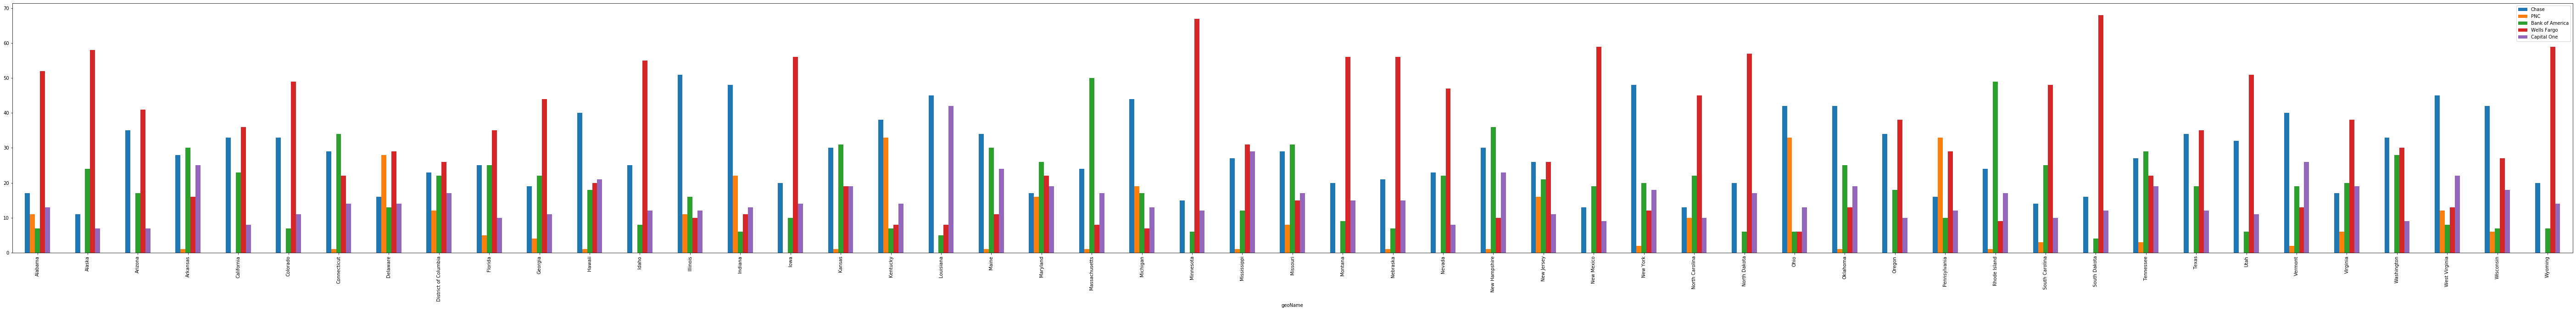

In [153]:
# Interest by Region
# The values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

#Plots interest by region per state within selected timeframe
interest_by_region_df.plot(figsize=(100, 10), kind ='bar')




    

In [171]:

# Related Queries, returns a dictionary of dataframes

# For Top, values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.

# For Rising, the values are uncertain but may be interpreted as rounded searches for timeframe
bank_list = ['Bank']

pytrend.build_payload(kw_list = bank_list, timeframe = user_timeframe, geo=user_geo, cat='7')
related_queries_dict = pytrend.related_queries()
related_queries_dict




{'Bank': {'top':                       query  value
  0                   bank of    100
  1           bank of america     83
  2              bank america     81
  3                chase bank     24
  4                   us bank     21
  5                first bank     18
  6                  pnc bank     14
  7                   td bank     12
  8                state bank      8
  9                union bank      7
  10         wells fargo bank      7
  11          huntington bank      7
  12             capital bank      7
  13           community bank      6
  14   bank of america online      6
  15    bank of america login      6
  16      first national bank      6
  17  bank of america near me      5
  18                 key bank      5
  19         capital one bank      5
  20             regions bank      4
  21         fifth third bank      4
  22          credit one bank      4
  23       chase bank near me      4
  24            citizens bank      4,
  'rising':           

In [170]:

# Get Google Hot Trends data
trending_searches_df = pytrend.trending_searches()
print(trending_searches_df.head())
print('------------')




                  0
0             Mbira
1      Nick Cordero
2     Lori Loughlin
3      Lana Del Rey
4  Kayleigh McEnany
------------


In [163]:
# Get Google Hot Trends data
today_searches_df = pytrend.today_searches()
print(today_searches_df.head())
print('------------')

# Get Google Top Charts
top_charts_df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
print(top_charts_df.head())

# Get Google Keyword Suggestions
suggestions_dict = pytrend.suggestions(keyword='Wells Fargo')
suggestions_dict

0               Mbira
1        Nick Cordero
2       Lori Loughlin
3        Lana Del Rey
4    Kayleigh McEnany
Name: query, dtype: object
------------
                   title exploreQuery
0  India vs South Africa             
1          Cameron Boyce             
2           Copa America             
3    Bangladesh vs India             
4              iPhone 11             


[{'mid': '/m/01kdws',
  'title': 'Wells Fargo',
  'type': 'Financial services company'},
 {'mid': '/g/11b7c7pxzj',
  'title': 'Wells Fargo Home Mortgage',
  'type': 'Topic'},
 {'mid': '/m/03vwwx', 'title': 'Wells Fargo Advisors', 'type': 'Subsidiary'},
 {'mid': '/m/038h0x',
  'title': 'Wells Fargo Center',
  'type': 'Arena in Philadelphia, Pennsylvania'},
 {'mid': '/g/11b7chm9sc', 'title': 'Wells Fargo ATM', 'type': 'Topic'}]

In [ ]:
historical_interest = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='US', gprop='', sleep=0)